# Physical Activity Monitoring: Data Analysis and Actionable Insights

## 1. Introduction:

With wearable technology developing at a rapid pace, Trivisio is working to establish its Colibri Wireless division as a market leader. Modern sensors such as orientation, temperature, and magnetic field are combined with acceleration, angular rate, and magnetic field sensors in this inertial measurement unit (IMU). In order to strengthen the Trivisio product's advantage over rivals like InterSense, Xsens, Vicon, and Optotrak Certus, we examine a comprehensive dataset gathered from nine participants donning three IMUs and a heart-rate monitor.

In order to provide useful insights for product improvement, this analysis goes beyond a simple data exploration and takes a strategic approach to utilising predictive modelling. Twelve different physical activities are represented by the 54 properties that each row in the dataset captures. This data goldmine has the key to deciphering user behaviour and improving our product's capabilities, from walking and cycling to more subtle behaviours.

In order to identify patterns, trends, and outliers, we undertake an exploratory data analysis (EDA) while navigating the complexities of the data. This opens the door for focused improvements by providing the groundwork for well-informed decision-making. The careful preprocessing of the dataset involves the incorporation of subject data, guaranteeing a comprehensive comprehension of the individual attributes impacting the data. This study explores feature selection using methods such as Linear Regression models and Sequential Feature Selector (SFS). Not only is prediction the aim, but also figuring out what factors influence these forecasts. 

As we move forward, the report reveals practical suggestions. These include improvements to the software, adjustments to the hardware, and the thoughtful addition of a heart sensor to the hand IMU device. Our goal is not just to analyse but also to provide concrete solutions that will help Colibri Wireless from Trivisio stand out in the competitive wearables industry. This paper is essentially a strategic compass that will steer Trivisio towards innovation, competitiveness, and a future in which the Colibri Wireless unit will be more than simply a gadget—rather, it will be an important companion in the wearable technology space. It goes beyond a technical exploration.

**Note:** The detailed analyses and findings pertaining to model construction, exploratory data analysis, and practical recommendations will be covered in greater detail in the entire report.

### 1.1 Data Overview:

The collection of detailed information is necessary to interpret user behaviour and improve the functionality of the Colibri Wireless device. With 54 characteristics per reading, the data contains IMU readings from the wrist, chest, and ankle, providing information on acceleration, angular rate, and magnetic field dynamics.

While Activity IDs classify different physical activities, timestamps accompany each input to facilitate temporal analysis. The demographic information of the subjects enriches the dataset and enables customised model building. The data collection protocol and activity descriptions, among other supplemental documentation, serve as a guide for the analysis.

This diverse dataset forms the basis for predictive modelling, which seeks to identify trends, enhance product functionality, and surpass rivals in the field of motion-sensing technologies. The task at hand involves deriving practical conclusions from this combination of mobility data, physiological signs, and personal traits, advancing the Colibri Wireless device towards an unprecedented level of precision and user-centered design.

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from scipy import stats
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import itertools
import warnings

## 2. Data cleaning and Data wrangling:

### 2.1 Data wrangling:

Examining one of the subject files' contents to determine the type of data and how to better represent it for upcoming data analysis and modelling.

In [2]:
#reading the subject 101 protocol data
protocol_101_df=pd.read_csv("Protocol/subject101.dat", delimiter=' ', header=None)
protocol_101_df

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.008300,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.006577,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.003014,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,0.003175,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,0.012698,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376412,3772.50,0,NaN,30.5,2.02477,7.29553,5.74194,2.06573,6.57692,5.92695,...,0.048745,-0.008034,0.018600,-58.8381,-36.2397,-11.0980,1.0,0.0,0.0,0.0
376413,3772.51,0,NaN,30.5,2.10836,7.86504,5.85674,2.08754,7.42244,5.87977,...,0.042113,0.024647,0.013375,-58.9537,-36.3379,-11.7170,1.0,0.0,0.0,0.0
376414,3772.52,0,NaN,30.5,2.07163,8.39581,5.77742,2.13833,8.05640,5.90853,...,-0.014889,0.026009,0.025054,-59.1781,-35.8985,-10.9678,1.0,0.0,0.0,0.0
376415,3772.53,0,NaN,30.5,2.19569,8.77634,6.00892,2.11251,8.53989,5.93770,...,0.047026,-0.035531,0.024640,-58.8299,-36.6845,-10.8553,1.0,0.0,0.0,0.0


We can observe from the data above that the.dat files do not define any column headings. Consequently, we must initialise a DataFrame with column headings in order to perform the data analysis. Each variable in the dataset has a label represented by a column header, which serves as a clear point of reference. They improve the interpretability of the data, enabling us to comprehend the type of information contained in each column. In datasets with many columns, this clarity is quite crucial. Additionally, by lowering the possibility of mistakes during modification, column headers support data integrity.

Additionally, column headings provide guidance for users interacting with the dataset by way of documentation. It becomes difficult to correctly analyse and use the data without appropriate headers. This makes sure that the data operations and analyses that come next are meaningful and well-structured, which makes the process of exploring data easier and more accurate.

In [3]:
# Initializing the DataFrame with column headers
column_headers = ['timestamp (seconds)', 'activity ID', 'heart_rate (bpm)', 'hand - temperature', 'hand_acceleration(±16g)_x',
                   'hand_acceleration(±16g)_y', 'hand_acceleration(±16g)_z', 'hand_acceleration(±6g)_x', 'hand_acceleration(±6g)_y', 'hand_acceleration(±6g)_z', 'hand_gyroscope_x', 'hand_gyroscope_y',
                   'hand_gyroscope_z', 'hand_magnetometer_x', 'hand_magnetometer_y', 'hand_magnetometer_z',
                   'hand_orientation_1', 'hand_orientation_2', 'hand_orientation_3', 'hand_orientation_4',
                   'chest - temperature', 'chest_acceleration(±16g)_x', 'chest_acceleration(±16g)_y',
                   'chest_acceleration(±16g)_z', 'chest_acceleration(±6g)_x', 'chest_acceleration(±6g)_y',
                   'chest_acceleration(±6g)_z', 'chest_gyroscope_x', 'chest_gyroscope_y', 'chest_gyroscope_z',
                   'chest_magnetometer_x', 'chest_magnetometer_y', 'chest_magnetometer_z', 'chest_orientation_1',
                   'chest_orientation_2', 'chest_orientation_3', 'chest_orientation_4',
                   'ankle - temperature', 'ankle_acceleration(±16g)_x', 'ankle_acceleration(±16g)_y',
                   'ankle_acceleration(±16g)_z', 'ankle_acceleration(±6g)_x', 'ankle_acceleration(±6g)_y',
                   'ankle_acceleration(±6g)_z', 'ankle_gyroscope_x', 'ankle_gyroscope_y', 'ankle_gyroscope_z',
                   'ankle_magnetometer_x', 'ankle_magnetometer_y', 'ankle_magnetometer_z', 'ankle_orientation_1',
                   'ankle_orientation_2', 'ankle_orientation_3', 'ankle_orientation_4']

# Creating an empty DataFrame with column headers
df_protocol_raw = pd.DataFrame(columns=column_headers)
df_protocol_raw['Subject_ID'] = ""
# Reordering columns with 'Subject_ID' as the first column
df_protocol_raw = df_protocol_raw[['Subject_ID'] + [col for col in df_protocol_raw.columns if col != 'Subject_ID']]
# Creating a DataFrame with subject information
df_subjects = pd.DataFrame(data=[[101, 'Male', 27, 182, 83, 75, 193, 'right'],
                                 [102, 'Female', 25, 169, 78, 74, 195, 'right'],
                                 [103, 'Male', 31, 187, 92, 68, 189, 'right'],
                                 [104, 'Male', 24, 194, 95, 58, 196, 'right'],
                                 [105, 'Male', 26, 180, 73, 70, 194, 'right'],
                                 [106, 'Male', 26, 183, 69, 60, 194, 'right'],
                                 [107, 'Male', 23, 173, 86, 60, 197, 'right'],
                                 [108, 'Male', 32, 179, 87, 66, 188, 'left'],
                                 [109, 'Male', 31, 168, 65, 54, 189, 'right']],
                                columns=['Subject_ID', 'Sex', 'Age_(years)', 'Height_(cm)', 'Weight_(kg)', 
                                         'Resting HR_(bpm)', 'Max_HR_(bpm)', 'Dominant_hand'])

protocol_ids=[101, 102, 103, 104, 105, 106, 107, 108, 109]
# Importing protocol data for each subject
for i in protocol_ids:
    df1 = pd.read_csv(f"Protocol/subject{i}.dat", names=column_headers, delimiter=" ")    
    # Adding 'Subject_ID' column to match subject identifier
    df1.insert(loc=0, column='Subject_ID', value=f"{i}")    
    # Appending the data to the main DataFrame
    df_protocol_raw = df_protocol_raw.append(df1)   
    # Deleting the temporary DataFrame to free up memory
    del df1


C:\Users\yogi badepalli\AppData\Local\Temp\ipykernel_35540\1103965491.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_protocol_raw = df_protocol_raw.append(df1)
C:\Users\yogi badepalli\AppData\Local\Temp\ipykernel_35540\1103965491.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_protocol_raw = df_protocol_raw.append(df1)
C:\Users\yogi badepalli\AppData\Local\Temp\ipykernel_35540\1103965491.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_protocol_raw = df_protocol_raw.append(df1)
C:\Users\yogi badepalli\AppData\Local\Temp\ipykernel_35540\1103965491.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_protocol_ra

In [4]:
df_protocol_raw

,Subject_ID,timestamp (seconds),activity ID,heart_rate (bpm),hand - temperature,hand_acceleration(±16g)_x,hand_acceleration(±16g)_y,hand_acceleration(±16g)_z,hand_acceleration(±6g)_x,hand_acceleration(±6g)_y,...,ankle_gyroscope_x,ankle_gyroscope_y,ankle_gyroscope_z,ankle_magnetometer_x,ankle_magnetometer_y,ankle_magnetometer_z,ankle_orientation_1,ankle_orientation_2,ankle_orientation_3,ankle_orientation_4
0,101,8.38,0,104.0,30.0000,2.37223,8.60074,3.51048,2.43954,8.76165,...,0.008300,0.009250,-0.017580,-61.1888,-38.95990,-58.143800,1.000000,0.000000,0.000000,0.000000
1,101,8.39,0,NaN,30.0000,2.18837,8.56560,3.66179,2.39494,8.55081,...,-0.006577,-0.004638,0.000368,-59.8479,-38.89190,-58.525300,1.000000,0.000000,0.000000,0.000000
2,101,8.40,0,NaN,30.0000,2.37357,8.60107,3.54898,2.30514,8.53644,...,0.003014,0.000148,0.022495,-60.7361,-39.41380,-58.399900,1.000000,0.000000,0.000000,0.000000
3,101,8.41,0,NaN,30.0000,2.07473,8.52853,3.66021,2.33528,8.53622,...,0.003175,-0.020301,0.011275,-60.4091,-38.76350,-58.395600,1.000000,0.000000,0.000000,0.000000
4,101,8.42,0,NaN,30.0000,2.22936,8.83122,3.70000,2.23055,8.59741,...,0.012698,-0.014303,-0.002823,-61.5199,-39.38790,-58.269400,1.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8472,109,100.19,0,NaN,25.1875,-4.71493,10.22250,4.66893,-5.04654,9.94944,...,-0.037788,-0.062676,-0.127084,-46.5153,3.58240,-0.035995,0.598531,0.033615,0.799791,-0.031075
8473,109,100.20,0,NaN,25.1875,-4.95932,10.37130,4.12594,-4.96890,10.29620,...,-0.068904,-0.027006,-0.089808,-45.7474,3.54453,0.108583,0.598428,0.033012,0.799933,-0.030018
8474,109,100.21,0,NaN,25.1875,-4.93997,9.83615,3.70468,-5.04613,10.35690,...,-0.070888,-0.038024,-0.064709,-46.3997,4.22078,0.105504,0.598233,0.033172,0.800095,-0.029416
8475,109,100.22,0,NaN,25.1875,-4.64941,9.11129,3.51904,-5.06854,9.75268,...,0.018961,-0.025796,-0.064357,-46.5282,4.48593,0.530240,0.598116,0.033427,0.800180,-0.029208


In [5]:
# Creating an empty DataFrame with column headers
df_optional_raw=pd.DataFrame(columns=column_headers)
df_optional_raw['Subject_ID'] = ""
# Reordering columns with 'Subject_ID' as the first column
df_optional_raw = df_optional_raw[['Subject_ID'] + [col for col in df_optional_raw.columns if col != 'Subject_ID']]
optional_ids= [101, 105, 106, 108, 109]
# Importing optional data
for i in optional_ids:
    df2 = pd.read_csv(f"Optional/subject{i}.dat", names=column_headers, delimiter=" ")
    df2.insert(loc=0, column='Subject_ID', value=f"{i}")
    df_optional_raw = df_optional_raw.append(df2)
    del df2

C:\Users\yogi badepalli\AppData\Local\Temp\ipykernel_35540\1387466574.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_optional_raw = df_optional_raw.append(df2)
C:\Users\yogi badepalli\AppData\Local\Temp\ipykernel_35540\1387466574.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_optional_raw = df_optional_raw.append(df2)
C:\Users\yogi badepalli\AppData\Local\Temp\ipykernel_35540\1387466574.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_optional_raw = df_optional_raw.append(df2)
C:\Users\yogi badepalli\AppData\Local\Temp\ipykernel_35540\1387466574.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_optional_ra

In [6]:
df_optional_raw

,Subject_ID,timestamp (seconds),activity ID,heart_rate (bpm),hand - temperature,hand_acceleration(±16g)_x,hand_acceleration(±16g)_y,hand_acceleration(±16g)_z,hand_acceleration(±6g)_x,hand_acceleration(±6g)_y,...,ankle_gyroscope_x,ankle_gyroscope_y,ankle_gyroscope_z,ankle_magnetometer_x,ankle_magnetometer_y,ankle_magnetometer_z,ankle_orientation_1,ankle_orientation_2,ankle_orientation_3,ankle_orientation_4
0,101,10.03,0,105.0,33.3125,1.99964,6.94837,5.08845,2.62244,7.73457,...,-0.013780,0.009471,0.003633,-43.8463,-2.97306,45.0822,1.000000,0.000000,0.000000,0.000000
1,101,10.04,0,NaN,33.3125,1.80990,6.45729,5.16424,2.19725,6.93762,...,-0.026320,0.070031,0.001804,-43.8385,-2.55481,46.8195,1.000000,0.000000,0.000000,0.000000
2,101,10.05,0,NaN,33.3125,1.82756,5.93151,5.78208,2.01408,6.28989,...,-0.049060,-0.002170,0.012096,-43.6100,-3.00084,46.5653,1.000000,0.000000,0.000000,0.000000
3,101,10.06,0,NaN,33.3125,1.75760,5.78202,5.97397,1.83344,5.83858,...,-0.031388,-0.008545,0.007356,-43.5199,-1.99822,45.5850,1.000000,0.000000,0.000000,0.000000
4,101,10.07,0,NaN,33.3125,1.50670,6.20407,6.27669,1.71564,5.82465,...,0.024549,0.036445,-0.004679,-43.6258,-2.43575,45.5812,1.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193467,109,1940.78,0,NaN,24.8750,-6.51915,6.87682,2.34395,-6.67159,6.87843,...,-0.040479,0.028883,-0.016737,-40.1550,-18.41770,25.3998,0.276396,-0.692785,0.412759,-0.522766
193468,109,1940.79,0,NaN,24.8750,-6.47548,6.95375,2.49829,-6.71706,6.87873,...,-0.005168,0.040632,-0.015746,-39.7605,-18.82270,25.6854,0.276461,-0.692737,0.412749,-0.522804
193469,109,1940.80,0,NaN,24.8750,-6.58698,6.84148,2.57398,-6.79405,6.81875,...,0.022185,0.068296,0.001916,-39.3718,-19.09960,25.6871,0.276468,-0.692669,0.412555,-0.523042
193470,109,1940.81,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.005940,-0.011902,0.006604,-39.5070,-18.96540,25.2609,0.276608,-0.692688,0.412525,-0.522966


Creating a comprehensive dataset **df_total** that includes both protocol and optional data of subjects activities which is useful for further analysis and modeling.

In [7]:
# Concatenating DataFrames df_protocol_raw and df_optional_raw vertically
df_total = pd.concat([df_protocol_raw, df_optional_raw])
df_total

,Subject_ID,timestamp (seconds),activity ID,heart_rate (bpm),hand - temperature,hand_acceleration(±16g)_x,hand_acceleration(±16g)_y,hand_acceleration(±16g)_z,hand_acceleration(±6g)_x,hand_acceleration(±6g)_y,...,ankle_gyroscope_x,ankle_gyroscope_y,ankle_gyroscope_z,ankle_magnetometer_x,ankle_magnetometer_y,ankle_magnetometer_z,ankle_orientation_1,ankle_orientation_2,ankle_orientation_3,ankle_orientation_4
0,101,8.38,0,104.0,30.000,2.37223,8.60074,3.51048,2.43954,8.76165,...,0.008300,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.000000,0.000000,0.000000,0.000000
1,101,8.39,0,NaN,30.000,2.18837,8.56560,3.66179,2.39494,8.55081,...,-0.006577,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.000000,0.000000,0.000000,0.000000
2,101,8.40,0,NaN,30.000,2.37357,8.60107,3.54898,2.30514,8.53644,...,0.003014,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.000000,0.000000,0.000000,0.000000
3,101,8.41,0,NaN,30.000,2.07473,8.52853,3.66021,2.33528,8.53622,...,0.003175,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.000000,0.000000,0.000000,0.000000
4,101,8.42,0,NaN,30.000,2.22936,8.83122,3.70000,2.23055,8.59741,...,0.012698,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193467,109,1940.78,0,NaN,24.875,-6.51915,6.87682,2.34395,-6.67159,6.87843,...,-0.040479,0.028883,-0.016737,-40.1550,-18.4177,25.3998,0.276396,-0.692785,0.412759,-0.522766
193468,109,1940.79,0,NaN,24.875,-6.47548,6.95375,2.49829,-6.71706,6.87873,...,-0.005168,0.040632,-0.015746,-39.7605,-18.8227,25.6854,0.276461,-0.692737,0.412749,-0.522804
193469,109,1940.80,0,NaN,24.875,-6.58698,6.84148,2.57398,-6.79405,6.81875,...,0.022185,0.068296,0.001916,-39.3718,-19.0996,25.6871,0.276468,-0.692669,0.412555,-0.523042
193470,109,1940.81,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.005940,-0.011902,0.006604,-39.5070,-18.9654,25.2609,0.276608,-0.692688,0.412525,-0.522966


In [8]:
#converting the specific columns in the DataFrame df to integer data types using the astype method
convert_dict = {'activity ID':'int64'}
df_total = df_total.astype(convert_dict)
#'actor_1_fb_likes':'int64',
print(df_total.dtypes)

Subject_ID                     object
timestamp (seconds)           float64
activity ID                     int64
heart_rate (bpm)              float64
hand - temperature            float64
hand_acceleration(±16g)_x     float64
hand_acceleration(±16g)_y     float64
hand_acceleration(±16g)_z     float64
hand_acceleration(±6g)_x      float64
hand_acceleration(±6g)_y      float64
hand_acceleration(±6g)_z      float64
hand_gyroscope_x              float64
hand_gyroscope_y              float64
hand_gyroscope_z              float64
hand_magnetometer_x           float64
hand_magnetometer_y           float64
hand_magnetometer_z           float64
hand_orientation_1            float64
hand_orientation_2            float64
hand_orientation_3            float64
hand_orientation_4            float64
chest - temperature           float64
chest_acceleration(±16g)_x    float64
chest_acceleration(±16g)_y    float64
chest_acceleration(±16g)_z    float64
chest_acceleration(±6g)_x     float64
chest_accele

### 2.2 Data Cleaning:

In the summary of the collected report data, It is stated that two accelerometer sensors are present, one with a 16 g scale and the other with a 6 g scale. Using accelerometer data with a 16g scale is advised as the measurements obtained with a 6g scale are not reliable. Information concerning the subjects' orientation data that was deemed invalid during data collection is included later in the info file. I removed the indicated data from the data because it is not relevant to our analysis.

In [9]:
#discarding imprecision caused by mismatch in frequency between IMU + HR monitors and discarding invalid orientation data
columns_to_drop= ['hand_acceleration(±6g)_x','hand_acceleration(±6g)_y',  'hand_acceleration(±6g)_z','hand_orientation_1',  'hand_orientation_2','hand_orientation_3',  'hand_orientation_4',
                   'chest_acceleration(±6g)_x','chest_acceleration(±6g)_y',  'chest_acceleration(±6g)_z','chest_orientation_1',  'chest_orientation_2','chest_orientation_3',  'chest_orientation_4',
                    'ankle_acceleration(±6g)_x','ankle_acceleration(±6g)_y',  'ankle_acceleration(±6g)_z','ankle_orientation_1',  'ankle_orientation_2','ankle_orientation_3',  'ankle_orientation_4']
df_total.drop(columns=columns_to_drop, inplace=True)
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3850505 entries, 0 to 193471
Data columns (total 34 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Subject_ID                  object 
 1   timestamp (seconds)         float64
 2   activity ID                 int64  
 3   heart_rate (bpm)            float64
 4   hand - temperature          float64
 5   hand_acceleration(±16g)_x   float64
 6   hand_acceleration(±16g)_y   float64
 7   hand_acceleration(±16g)_z   float64
 8   hand_gyroscope_x            float64
 9   hand_gyroscope_y            float64
 10  hand_gyroscope_z            float64
 11  hand_magnetometer_x         float64
 12  hand_magnetometer_y         float64
 13  hand_magnetometer_z         float64
 14  chest - temperature         float64
 15  chest_acceleration(±16g)_x  float64
 16  chest_acceleration(±16g)_y  float64
 17  chest_acceleration(±16g)_z  float64
 18  chest_gyroscope_x           float64
 19  chest_gyroscope_y     

Data with activity ID = 0 is excluded because it contains transitory actions that occur during breaks or transitions and add to noise. This involves combining portions of a recording where there was an interruption in data gathering, as seen by anomalies in the heart rate data during these transients

In [10]:
# discarding transient activities
df_total=df_total.loc[df_total['activity ID']!=0]

In addition, the data providers point out that the heart rate monitor's precision is lacking because there is a discrepancy in the rates at which the heart monitor and the IMUs gather data. 

In [11]:
heart_count_missing=df_total['heart_rate (bpm)'].isna().sum()
print(f"There are {heart_count_missing:,.0f} missing heart rate records due to difference in frequency.")

There are 2,476,126 missing heart rate records due to difference in frequency.


Since the heart monitor values are unlikely to change considerably over such a short period of time, I have chosen to fill in the missing data in order to preserve the size of the data set. As a result, a uniformly sized sample was produced, enabling a more thorough and insightful investigation.

In [12]:
df_total['heart_rate (bpm)'].fillna(method='ffill', axis=0, inplace=True)
df_re_total=df_total.isna().any(axis=0).sum()
print(f"After filling the missing heart data, still there are {df_re_total:,.0f} records missing one or more values.")

After filling the missing heart data, still there are 31 records missing one or more values.


And removed the remaining Nan's exist the data which doesn't impact the analysis to ensure uniformity in the dataset's structure.

In [13]:
df_total = df_total.dropna()
df_total= df_total.reset_index(drop=True)
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2701006 entries, 0 to 2701005
Data columns (total 34 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Subject_ID                  object 
 1   timestamp (seconds)         float64
 2   activity ID                 int64  
 3   heart_rate (bpm)            float64
 4   hand - temperature          float64
 5   hand_acceleration(±16g)_x   float64
 6   hand_acceleration(±16g)_y   float64
 7   hand_acceleration(±16g)_z   float64
 8   hand_gyroscope_x            float64
 9   hand_gyroscope_y            float64
 10  hand_gyroscope_z            float64
 11  hand_magnetometer_x         float64
 12  hand_magnetometer_y         float64
 13  hand_magnetometer_z         float64
 14  chest - temperature         float64
 15  chest_acceleration(±16g)_x  float64
 16  chest_acceleration(±16g)_y  float64
 17  chest_acceleration(±16g)_z  float64
 18  chest_gyroscope_x           float64
 19  chest_gyroscope_y    

## 3. Exploratory Data analysis

The exploratory data analysis (EDA) conducted on the Physical Activity Monitoring dataset revealed valuable insights into the nature of the collected data. First, transient activities labelled with activityID=0 were removed from the data, focusing on the intervals between different activities or breaks in data collection. 

In order to shed light on individual differences in heart rate and activity patterns, the EDA procedure also included subject-specific analysis. A more sophisticated understanding of the distribution and variability of heart rates across various activities and participants was made possible by the visualisation of heart rate data using histograms and boxplots. This comprehensive analysis ensured a solid grasp of the dataset's subtleties and features, setting the basis for later modelling efforts and practical recommendations.

In [14]:
df_total.describe()

,timestamp (seconds),activity ID,heart_rate (bpm),hand - temperature,hand_acceleration(±16g)_x,hand_acceleration(±16g)_y,hand_acceleration(±16g)_z,hand_gyroscope_x,hand_gyroscope_y,hand_gyroscope_z,...,ankle - temperature,ankle_acceleration(±16g)_x,ankle_acceleration(±16g)_y,ankle_acceleration(±16g)_z,ankle_gyroscope_x,ankle_gyroscope_y,ankle_gyroscope_z,ankle_magnetometer_x,ankle_magnetometer_y,ankle_magnetometer_z
count,2.701006e+06,2.701006e+06,2.701006e+06,2.701006e+06,2.701006e+06,2.701006e+06,2.701006e+06,2.701006e+06,2.701006e+06,2.701006e+06,...,2.701006e+06,2.701006e+06,2.701006e+06,2.701006e+06,2.701006e+06,2.701006e+06,2.701006e+06,2.701006e+06,2.701006e+06,2.701006e+06
mean,1.521609e+03,9.718926e+00,1.025373e+02,3.282414e+01,-3.740113e+00,3.636870e+00,3.989378e+00,2.933741e-04,3.524839e-02,-5.359189e-03,...,3.365025e+01,9.033562e+00,-2.971045e-01,-2.765455e+00,6.143138e-03,-2.339669e-02,2.918981e-03,-2.970479e+01,1.294694e+00,1.793673e+01
std,1.036315e+03,6.272511e+00,2.732518e+01,1.895967e+00,6.306403e+00,6.571992e+00,4.217450e+00,1.301259e+00,9.434394e-01,1.452905e+00,...,1.306665e+00,6.078243e+00,7.112714e+00,3.827984e+00,1.043692e+00,5.792143e-01,1.754281e+00,1.934672e+01,2.188462e+01,2.045604e+01
min,3.120000e+01,1.000000e+00,5.700000e+01,2.487500e+01,-1.546090e+02,-1.043010e+02,-1.188460e+02,-2.813540e+01,-1.784950e+01,-1.426470e+01,...,2.956250e+01,-1.536740e+02,-1.574430e+02,-1.595850e+02,-2.907750e+01,-1.812690e+01,-1.647420e+01,-1.728650e+02,-1.404600e+02,-1.523230e+02
25%,6.486900e+02,4.000000e+00,8.200000e+01,3.181250e+01,-8.355260e+00,1.048983e+00,1.347090e+00,-2.986348e-01,-1.632387e-01,-2.498507e-01,...,3.275000e+01,8.266320e+00,-2.360400e+00,-3.878530e+00,-9.593890e-02,-5.892250e-02,-1.388723e-01,-4.083548e+01,-1.350368e+01,4.401287e+00
50%,1.292100e+03,1.000000e+01,9.600000e+01,3.318750e+01,-3.305415e+00,3.625675e+00,3.955490e+00,-5.608315e-03,4.485740e-03,-5.363205e-03,...,3.393750e+01,9.481590e+00,-2.185200e-01,-2.463710e+00,5.382710e-03,-3.424960e-03,3.104370e-04,-3.131870e+01,-3.679155e-01,1.983740e+01
75%,2.373250e+03,1.600000e+01,1.200000e+02,3.418750e+01,3.329610e-01,6.933275e+00,7.073310e+00,2.636447e-01,2.003618e-01,2.420445e-01,...,3.456250e+01,9.862740e+00,1.696000e+00,-1.235230e+00,7.131025e-02,6.218190e-02,4.979458e-02,-1.599570e+01,1.691340e+01,3.441490e+01
max,4.245680e+03,2.400000e+01,2.020000e+02,3.550000e+01,1.060340e+02,1.576110e+02,1.577600e+02,2.641580e+01,2.307790e+01,1.654800e+01,...,3.650000e+01,1.576880e+02,1.567980e+02,1.603430e+02,2.447930e+01,1.358820e+01,1.935600e+01,9.155160e+01,9.424780e+01,1.469000e+02


Understanding the general features of the data, spotting any outliers, and making wise decisions during the exploratory data analysis (EDA) are all made easier with the use of the statistics output mentioned above. Vital information is gleaned from the recorded data by the physiological and sensor-based metrics. An important measure of cardiovascular activity is the mean heart rate, which ranges from about 102 bpm to a standard deviation of 27 bpm. Different patterns may be seen in the temperature readings from the hand, chest, and ankle sensors; the average temperature is between 32 and 35 degrees Celsius. Interestingly, temperature swings are greater in the chest and ankle sensors compared to the hand. The readings from the magnetometer and gyroscope also show differences; the readings for the chest are consistently lower than the readings for the hand and ankle in all axes. It's interesting to see that the hand and ankle sensor magnitudes match up better, while the chest sensor magnitudes stay much lower. These findings demonstrate the complex interactions between motion-related and physiological markers, providing insightful indications for more research and analysis in the context of activity monitoring.

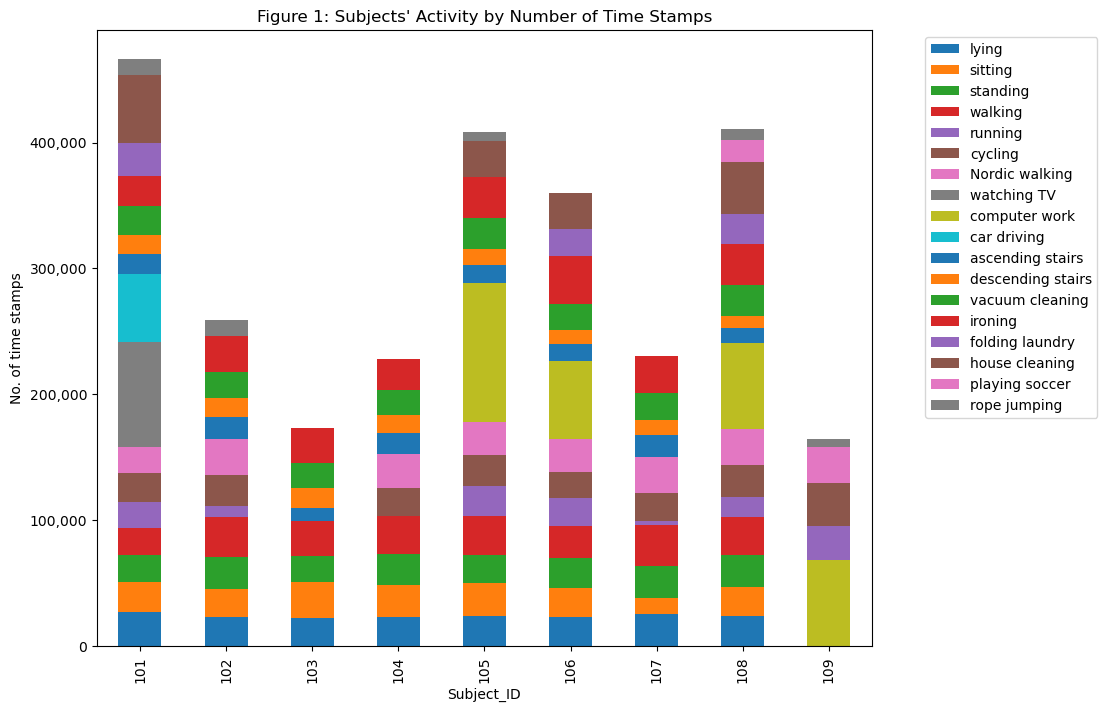

In [15]:
import matplotlib.pyplot as plt

# Your activity_names dictionary
activity_names = {1: 'lying', 2: 'sitting', 3: 'standing', 4: 'walking', 5: 'running', 6: 'cycling',
                  7: 'Nordic walking', 9: 'watching TV', 10: 'computer work', 11: 'car driving',
                  12: 'ascending stairs', 13: 'descending stairs', 16: 'vacuum cleaning', 17: 'ironing',
                  18: 'folding laundry', 19: 'house cleaning', 20: 'playing soccer', 24: 'rope jumping',
                  0: 'other (transient activities)'}

# Grouping by Subject_ID and activity ID, and unstacking
pivot1 = df_total.groupby(['Subject_ID', 'activity ID']).size().unstack(fill_value=0)

# Renaming columns using activity_names dictionary
pivot1.columns = pivot1.columns.map(activity_names)

# Plotting the bar chart
ax = pivot1.plot(kind="bar", title="Figure 1: Subjects' Activity by Number of Time Stamps", figsize=(10, 8), stacked=True)

# Formatting the y-axis
ax.yaxis.set_major_formatter('{x:,.0f}')

# Setting the y-axis label
ax.set_ylabel("No. of time stamps")

# Adding legend with mapped activity names
plt.legend(bbox_to_anchor=(1.3, 1), labels=activity_names.values())

# Displaying the plot
plt.show()

The activities carried out by each individual are shown in Figure 1, along with the matching recorded time in seconds at which each data reading was taken during the physical activity monitoring. If we look at the plot, we can see that the individuals' activities vary greatly from one another, which will affect the readings across 3 IMU's. 

<Figure size 1200x800 with 0 Axes>

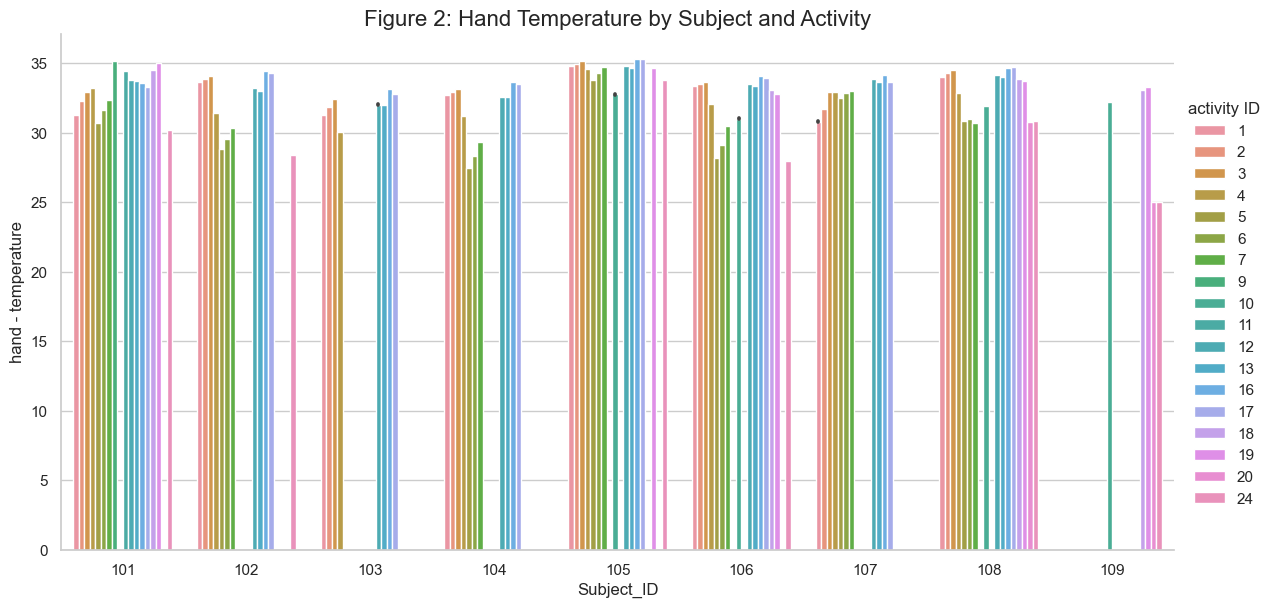

In [16]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Plotting using seaborn's catplot
plt.figure(figsize=(12, 8))
sns.catplot(x='Subject_ID', y='hand - temperature', hue='activity ID', data=df_total, kind='bar', height=6, aspect=2)

# Setting plot title
plt.title('Figure 2: Hand Temperature by Subject and Activity', fontsize=16)

# Display the plot
plt.show()

Figure 2 shows how the subjects hand temperatures varied depending on which activities they completed.

<Figure size 1200x800 with 0 Axes>

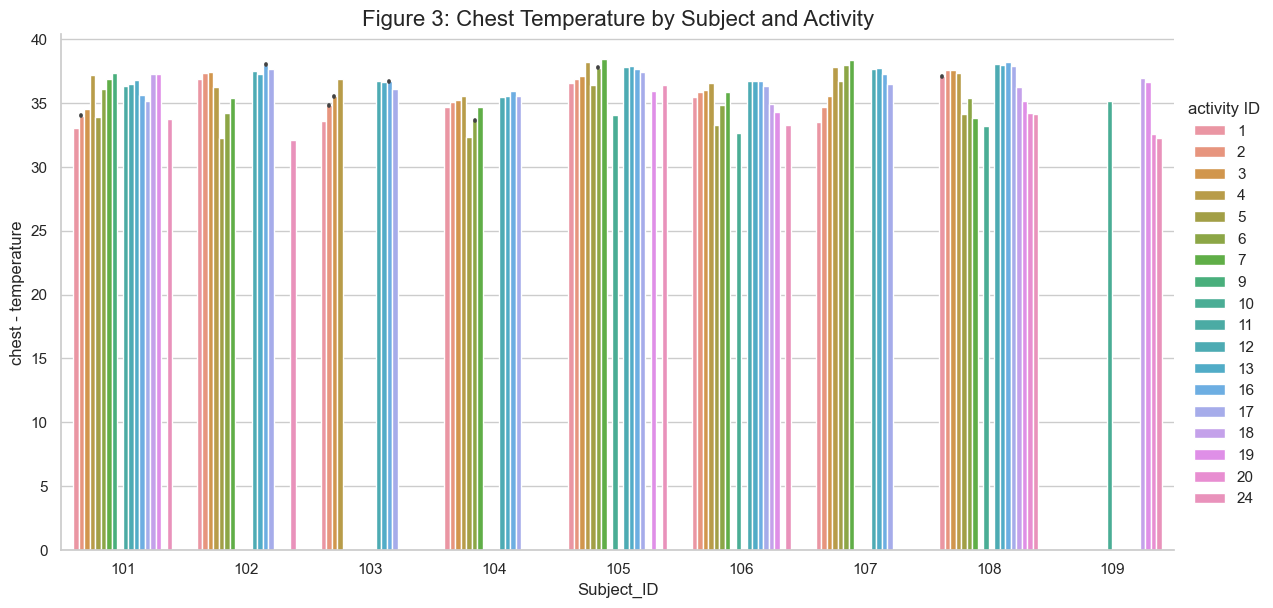

In [17]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Plotting using seaborn's catplot
plt.figure(figsize=(12, 8))
sns.catplot(x='Subject_ID', y='chest - temperature', hue='activity ID', data=df_total, kind='bar', height=6, aspect=2)

# Setting plot title
plt.title('Figure 3: Chest Temperature by Subject and Activity', fontsize=16)

# Display the plot
plt.show()

Figure 3 shows how the subjects chest temperatures varied depending on which activities they completed.

<Figure size 1200x800 with 0 Axes>

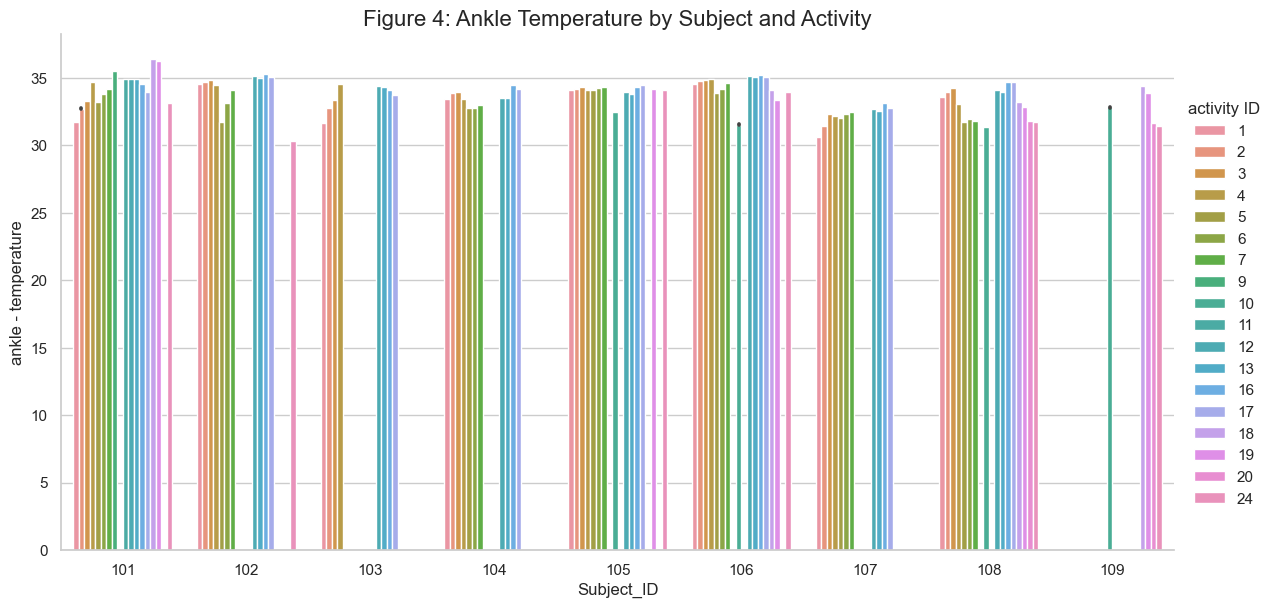

In [18]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Plotting using seaborn's catplot
plt.figure(figsize=(12, 8))
sns.catplot(x='Subject_ID', y='ankle - temperature', hue='activity ID', data=df_total, kind='bar', height=6, aspect=2)

# Setting plot title
plt.title('Figure 4: Ankle Temperature by Subject and Activity', fontsize=16)

# Display the plot
plt.show()

Figure 4 shows how the subjects ankle temperatures varied depending on which activities they completed.

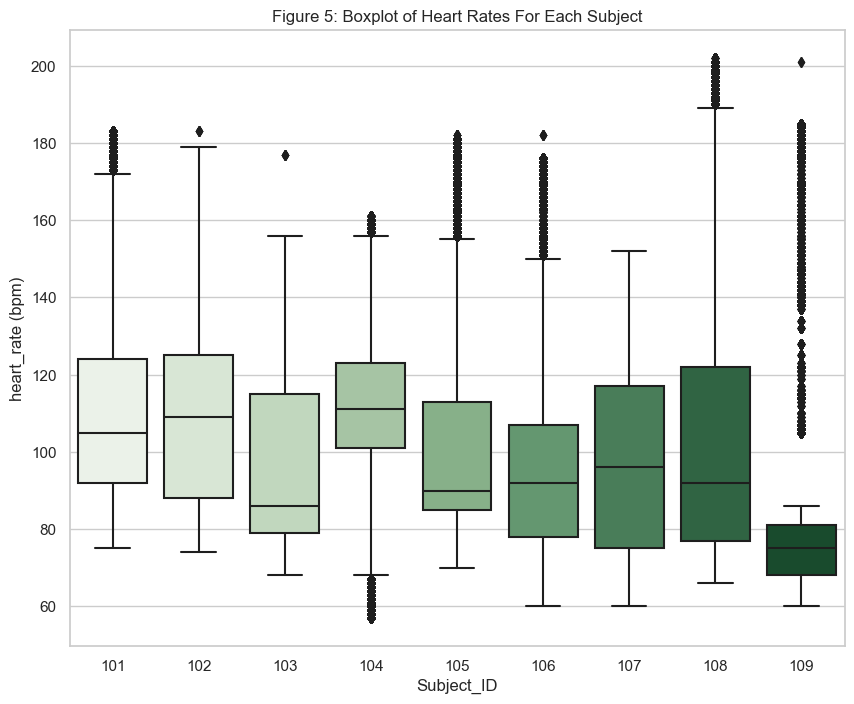

In [19]:
#box plot
plt.figure(figsize=(10,8))
sns.boxplot(data=df_total, x='Subject_ID', y='heart_rate (bpm)', palette='Greens', saturation=0.5, whis=1.5)
plt.title("Figure 5: Boxplot of Heart Rates For Each Subject")
plt.show()

Figure 5 is a boxplot of heart rates for nine different subjects, labeled from 101 to 109. The heart rate distribution for each participant is depicted in a boxplot, which offers information about the data's central tendency and distribution. In contrast to the other subjects, Subject 109 had a substantially lower median heart rate, which could be the result of measurement mistakes or variations in health. The data from participants 101, 103, 106, and 108 show outliers, which could indicate sporadic heart rate spikes or inconsistent measurement results.

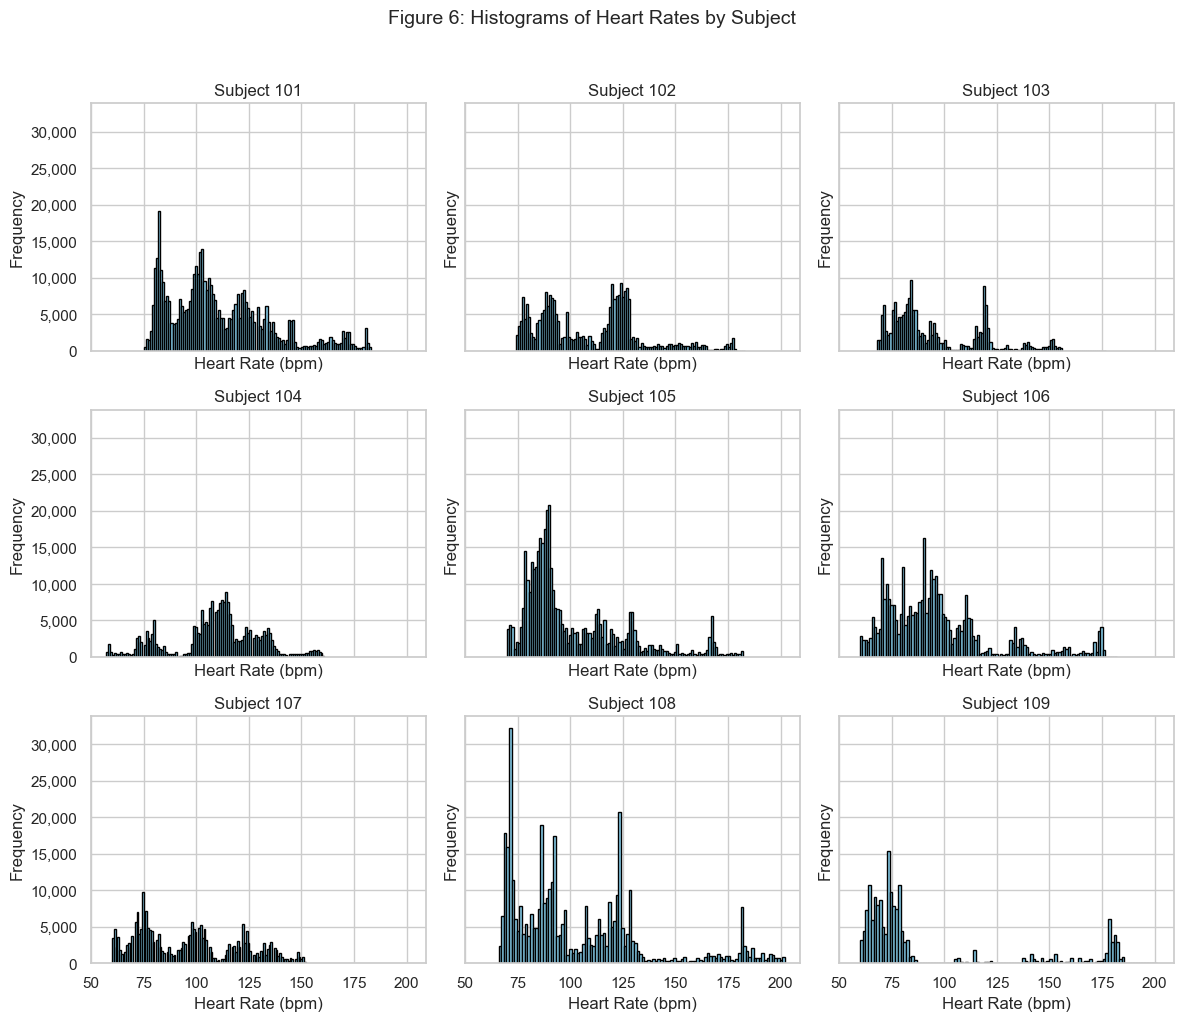

In [20]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Set up the subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10), sharex=True, sharey=True)

# Flatten the 2D array of subplots to simplify iteration
axes = axes.flatten()

# Plot histograms for each Subject_ID
for i, subject_id in enumerate(df_total['Subject_ID'].unique()):
    ax = axes[i]
    data = df_total[df_total['Subject_ID'] == subject_id]['heart_rate (bpm)']
    
    ax.hist(data,  bins=110, color='skyblue', edgecolor='black')
    
    ax.set_xlabel("Heart Rate (bpm)")
    ax.set_ylabel("Frequency")
    ax.set_title(f"Subject {subject_id}")
    
    # Format y-axis as comma-separated integers
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, p: f'{y:,.0f}'.format(y)))

# Set overall title
plt.suptitle('Figure 6: Histograms of Heart Rates by Subject', x=0.5, y=1.02, fontsize=14)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


Figure 6 displays the histograms of the subjects' heart rates, which show multiple peaks for some of the subjects. A large number of time stamps for various heart rates spaced somewhat apart are displayed for subjects 101, 105, 106, 108, and 109. This could indicate that respondents' resting heart rates are similar to one other, and that their resting heart rates are higher when engaging in activities that require more physical effort.

## 4. Mathematical Modelling

In order to obtain insightful information and provide predictions based on the gathered physical activity monitoring data, this report focuses on using mathematical modelling techniques, particularly Sequential Feature Selection (SFS) and Linear Regression. Identifying important features, creating a prediction model, and comprehending the connections between different attributes are the goals of using these tools.

### 4.1 Feature Selection: Sequential Feature Selector (SFS)

Sequential feature selection, is a potent technique for automatically choosing the most pertinent characteristics from a dataset. It chooses the subset that maximises the performance of the model by methodically evaluating various feature combinations. Through the identification of the critical variables that most influence the target variable's prediction, the effectiveness and interpretability of the ensuing models are improved.

In [21]:
# I adepted the below code from the Lab 10 lab exercise on similarity (Data Science Research Methods, 2023) [Van Yperen James] [1].
from sklearn.feature_selection import SequentialFeatureSelector

# Assuming X is your feature matrix and y is your target variable
# Drop the specified columns
X = df_total.drop(columns=["activity ID"])
y = df_total["activity ID"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Creatinf a linear regression model
lm = LinearRegression()
# Set the number of features you want to select
num_features = 5
# Initialize SequentialFeatureSelector
sfs = SequentialFeatureSelector(lm, n_features_to_select=num_features, direction='forward')
# Fit the SequentialFeatureSelector on the training data
sfs.fit(X_train, y_train)
# Get the selected feature names
selected_features = sfs.get_feature_names_out()
# Print the selected features
print("Selected Features:", selected_features)
# Transforming the original data to include only the selected features
X_train_selected = sfs.transform(X_train)
X_test_selected = sfs.transform(X_test)
# Now you can train your model on the selected features
lm.fit(X_train_selected, y_train)
# Evaluate the model on the test set
accuracy = lm.score(X_test_selected, y_test)
print("Model Accuracy:", accuracy)


Selected Features: ['heart_rate (bpm)' 'hand - temperature' 'chest - temperature'
 'chest_acceleration(±16g)_z' 'chest_magnetometer_x']
Model Accuracy: 0.25211441041559424


When Sequential Feature Selection (SFS) is used, the results show which features the algorithm thinks are most important to forecast the target variable. 'heart_rate (bpm)', 'hand - temperature', 'chest - temperature', 'chest_acceleration(±16g)_z', and 'chest_magnetometer_x' are highlighted in this instance. Taking a closer look at these choices' consequences:

**heart_rate (bpm):** One basic physiological sign that is useful in identifying the kind of activity is heart rate. SFS is aware of how crucial it is to use the information at hand to anticipate the target variable activity ID.

**hand - temperature and chest - temperature:** Body temperature could offer more context to help differentiate between various activities. According to the algorithm, these sites' temperature changes have a major impact on the model's ability to anticipate outcomes.

**chest_acceleration(±16g)_z:** The chest-mounted IMU's z-axis acceleration is chosen, suggesting that vertical acceleration could provide useful data for activity prediction.

**chest_magnetometer_x:** The magnetometer data from the chest sensor is selected along the x-axis. Magnetometer readings can provide information about the subject's orientation, which may help identify activities.

With a value of 0.2521, the Model Accuracy indicates how well the model fits the data. It shows the percentage of the target variable's (activity ID) variance that can be predicted based on the attributes that have been chosen. Since the model in this instance only accounts for about 25.21% of the variation, there may be space for improvement and the chosen characteristics might not be enough to produce reliable predictions.

Using these chosen features, a Linear Regression model would next be implemented in order to go forward. Each feature's influence on the anticipated result would be measured by the coefficients that the linear regression model produced. To improve the predictive model's accuracy and interpretability, features are refined and the model is evaluated iteratively.

In the aforementioned analysis, utilising the Akaike Information Criterion (AIC) to ascertain the ideal number of features in a Sequential Feature Selection (SFS) model is a legitimate and frequently more data-driven method than manually determining the feature count. AIC is a statistical metric that combines the model's simplicity (number of features) and goodness of fit. It takes a long time to run, but it helps prevent overfitting by penalising overly complex models. However, it is possible to achieve the desired result with fewer features, which does not imply that the features we have chosen are well-suited to the model. Therefore, I decided not to use AIC and instead manually defined the number of features.

### 4.2 Model: Linear Regression

The link between the chosen features and the target variable, such as the activity ID, is modelled using linear regression, a basic regression analysis technique. We can measure the effect of each attribute on the anticipated result by using Linear Regression, which involves fitting a linear equation to the data. This model turns into a useful tool for figuring out how different circumstances affect the response variable of choice and for forecasting and analysing those effects.

SFS and linear regression together provide a thorough method for creating a predictive model that may be used to provide practical insights. Based on a more thorough comprehension of the data patterns and linkages, the results of this mathematical modelling project are intended to offer suggestions for modifications to policies, software, or hardware configurations.

In [22]:
# I adepted the below code from the Lab 10 lab exercise on similarity (Data Science Research Methods, 2023) [Van Yperen James] [1].
# Selecting the features (independent variables) and the target variable (dependent variable)
X = df_total[["heart_rate (bpm)", "hand - temperature", "chest - temperature", "chest_acceleration(±16g)_z", "chest_magnetometer_x"]]
y = df_total["activity ID"]
# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)
# Creating a linear regression model
first_linear = linear_model.LinearRegression()
# Fitting the model to the training data
first_linear.fit(x_train, y_train)
# Extracting the coefficients of the model
coefficients = first_linear.coef_
# Creating a DataFrame to display the coefficients
model_output_df = pd.DataFrame(coefficients, x_train.columns, columns=["Coefficient"])
# Formatting the coefficients to two decimal places
model_output_df['Coefficient'] = model_output_df['Coefficient'].apply(lambda x: '{:.2f}'.format(x))
# Displaying the DataFrame with coefficients
model_output_df

,Coefficient
heart_rate (bpm),0.05
hand - temperature,1.64
chest - temperature,-1.40
chest_acceleration(±16g)_z,-0.48
chest_magnetometer_x,-0.05


In [23]:
# I adepted the below code from the Lab 10 lab exercise on similarity (Data Science Research Methods, 2023) [Van Yperen James] [1].
y_pred=first_linear.predict(x_test)
# calcuting MSE and R-squared values
MSE=metrics.mean_squared_error(y_test, y_pred)
R_sqrd = metrics.r2_score(y_test, y_pred)
print('MSE = ' + f'{MSE:.2f}')
print('R^2 = ' + f'{R_sqrd:.2f}')

MSE = 29.37
R^2 = 0.25



The estimated change in the response variable for a one-unit change in the predictor variable, holding other variables constant $^{2}$, is represented by the coefficients in a linear regression model.

The average squared discrepancy between the actual results that were observed and the model's predictions is measured by the Mean Squared Error, or MSE. Given the actual and anticipated activity IDs, the average squared difference (MSE) in this instance is 29.37.

Relative to the independent variables, the dependent variable (activity ID) has a predictable variance, which is expressed as R^2 (Coefficient of Determination). 25% of the variability in activity ID can be explained by the model, according to a R^2 value of 0.25.

Interpretation:

A positive correlation between heart rate and activity ID is indicated by the heart rate's positive coefficient.
The hand temperature's positive coefficient suggests that activity ID and hand temperature are positively correlated.
The chest magnetometer x, chest temperature, and chest acceleration in the z-direction all have negative coefficients, which suggest negative connections.

Since $R^2$ is so low, it's possible that the model doesn't fully account for the variability in activity ID. Examine adding more features or using a more sophisticated model.

### 4.3. Actionable Recommendations

Based on the above analyis and interpretation of the linear regression model:

**Heart Rate Monitoring:** It may be beneficial to emphasise the significance of heart rate monitoring during physical activities, as there is a correlation between elevated heart rate and increased projected activity ID. This could result in the creation of health-tracking or fitness applications that use heart rate to deliver real-time information on the intensity of an activity. In light of our analysis's finding that heart rate and anticipated activity ID are positively correlated, I suggest adding a heart rate sensor to the hand IMU device.We can improve the prediction accuracy of activity levels by adding a heart rate sensor to the hand IMU device. In addition to giving the model complete data, this innovation will give users a seamless, all-encompassing monitoring experience when engaging in physical activity.

- Benefits:

    - Better Predictive Model:  By integrating hand-derived heart rate data with the IMU unit, a more thorough and precise             prediction model is produced, capturing an important facet of user behaviour.

    - User Convenience: Because it conforms to the standard placement of wearables, placing the heart rate sensor on the hand         guarantees user comfort and convenience. This design decision encourages a wearable and more user-friendly experience.


**Temperature Considerations:** According to the model, there is a negative correlation between chest temperature and activity ID, but a positive correlation between hand temperature and ID. Monitoring body temperature while engaging in activities and comprehending its correlation with various forms of physical activity could be practical measures. This data may be utilised to alert users to possible overheating or to improve the workout environment. Thus, in order to help people enhance their exercise regimens, I advise creating an alert system based on overheating throughout the exercises.

It's crucial to remember that implementing the useful advice offered here requires careful consideration of ethical and privacy issues. The development approach should also include user feedback and incremental changes based on real-world data.

## 5. Conclusion

An extensive analysis of Trivisio's Colibri Wireless IMU data was carried out and the results are presented in this comprehensive study. Heart-rate monitor and IMU data were included in the dataset, which was gathered from nine participants participating in different physical activities. First, temporary activities with the label activityID=0 were removed, and meaningful activity titles were added. Important insights into the features of the dataset were found through exploratory data analysis (EDA), which made it easier to comprehend its structure.

In order to create a mathematical model for forecasting actions based on particular attributes, a predictive hypothesis was developed. After identifying pertinent features with the Sequential Feature Selector (SFS), a Linear Regression model was trained. The model's coefficient analysis shed light on the significance of the features, and it attained a moderate level of accuracy. Model performance was assessed using the Mean Squared Error (MSE) and R-squared measures. Practical suggestions are included in the report's conclusion, such as adding a heart rate sensor to the hand IMU unit. All things considered, this paper is a useful manual for utilising data-driven insights from Colibri Wireless IMU data for real-world applications.

## 6. Future work

**Model Improvement:** There is potential for improvement in the model, despite the modest $R^2$ value. To improve activity ID's predicted accuracy, think about adding more pertinent information or investigating more intricate models (such non-linear models). This could entail collecting a wider range of data, such as details on various forms of physical activity or extra sensor readings.

**Activity Intensity Categorization:** Examine whether creating a system that assigns activities to intensity levels according to the anticipated activity ID is feasible. By offering tailored suggestions for activities that correspond with their fitness levels, this could be helpful for people keeping track of their fitness objectives.

## References

1. Van Yperen J. (2023). Categorical variables & the data science process: Lab 10 Exercise. Data Science Research Methods,          University of Sussex. 
2. Uddin, M.A., Debnath, M., Roy, S., Adiba, S. and Talukder, M.M.A., 2023. Identifying the Smoking and Smokeless Tobacco-          Related Predictors on Frequencies of Heavy Vehicle Traffic Accidents in Bangladesh: Linear and Binary Logistic Regression-      Based Approach. Advances in Civil Engineering, 2023.